Table of Contents:
1.Import

2.Exploratory Data Analysis (EDA)

3.Data Preprocessing

4.Model Building

5.Model Evaluation**

In [1]:
# 1. Importing
# importing needed library.
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [2]:
# 2.Exploratory Data Analysis (EDA)
df = pd.read_csv("/kaggle/input/diamonds/diamonds.csv")

In [3]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [5]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [7]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
pd.unique(df['cut'])

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [9]:
# 3. Data Preprocessing

In [10]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [11]:
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(53920, 10)

In [12]:
df = df[(df["depth"]<80)&(df["depth"]>30)]
df = df[(df["table"]<80)&(df["table"]>30)]
df = df[(df["x"]<20)]
df = df[(df["y"]<20)]
df = df[(df["z"]<20)&(df["z"]>1)]
df.shape

(53916, 10)

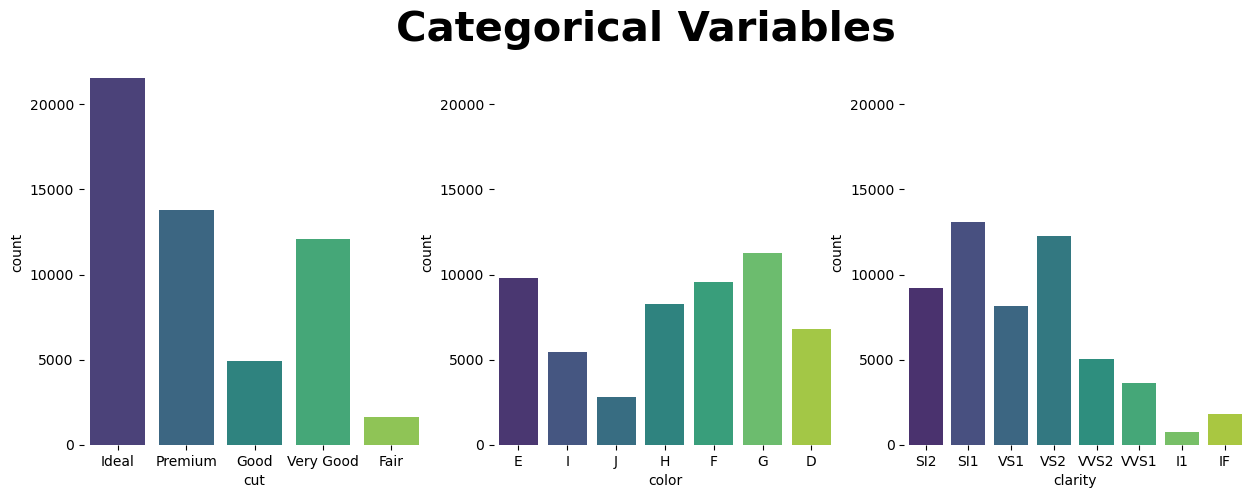

In [13]:
# Let's discuss categorical variables
cat_cols=df.select_dtypes(include='object').columns.to_list()

fig=plt.figure(figsize=(15,5))
plt.suptitle("Categorical Variables", size=30, weight='bold')
ax1=plt.subplot(131)
sns.countplot(data=df, x=cat_cols[0], ax=ax1, linewidth=2, palette='viridis')
for s in ['left','right','top','bottom']:
        ax1.spines[s].set_visible(False)
ax2=plt.subplot(132, sharey=ax1)
sns.countplot(data=df, x=cat_cols[1], ax=ax2,linewidth=2, palette='viridis')
for s in ['left','right','top','bottom']:
        ax2.spines[s].set_visible(False)
ax3=plt.subplot(133, sharey=ax1)
sns.countplot(data=df, x=cat_cols[2], ax=ax3,linewidth=2, palette='viridis')
for s in ['left','right','top','bottom']:
        ax3.spines[s].set_visible(False)

In [14]:
print("Initial features:\n", list(df.columns), "\n")
df_dummies = pd.get_dummies(df, dtype=float)
print("Features after get_dummies:\n", list(df_dummies.columns))


Initial features:
 ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z'] 

Features after get_dummies:
 ['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']


In [15]:
df_dummies

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [16]:
df_dummies.describe()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,53916.000000,53916.000000,53916.000000,53916.000000,53916.000000,53916.000000,53916.000000,53916.000000,53916.000000,53916.000000,...,53916.000000,53916.000000,53916.000000,53916.00000,53916.000000,53916.000000,53916.000000,53916.000000,53916.000000,53916.000000
mean,0.797664,61.749623,57.456243,3930.735088,5.731557,5.733381,3.539384,0.029824,0.090919,0.399640,...,0.100545,0.052081,0.013688,0.03320,0.242266,0.170339,0.151495,0.227279,0.067772,0.093961
std,0.473753,1.432267,2.228231,3987.043996,1.119357,1.111227,0.691603,0.170104,0.287497,0.489829,...,0.300728,0.222192,0.116193,0.17916,0.428458,0.375934,0.358534,0.419078,0.251357,0.291777
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.040000,62.500000,59.000000,5322.250000,6.540000,6.540000,4.040000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.010000,79.000000,79.000000,18823.000000,10.740000,10.540000,6.980000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

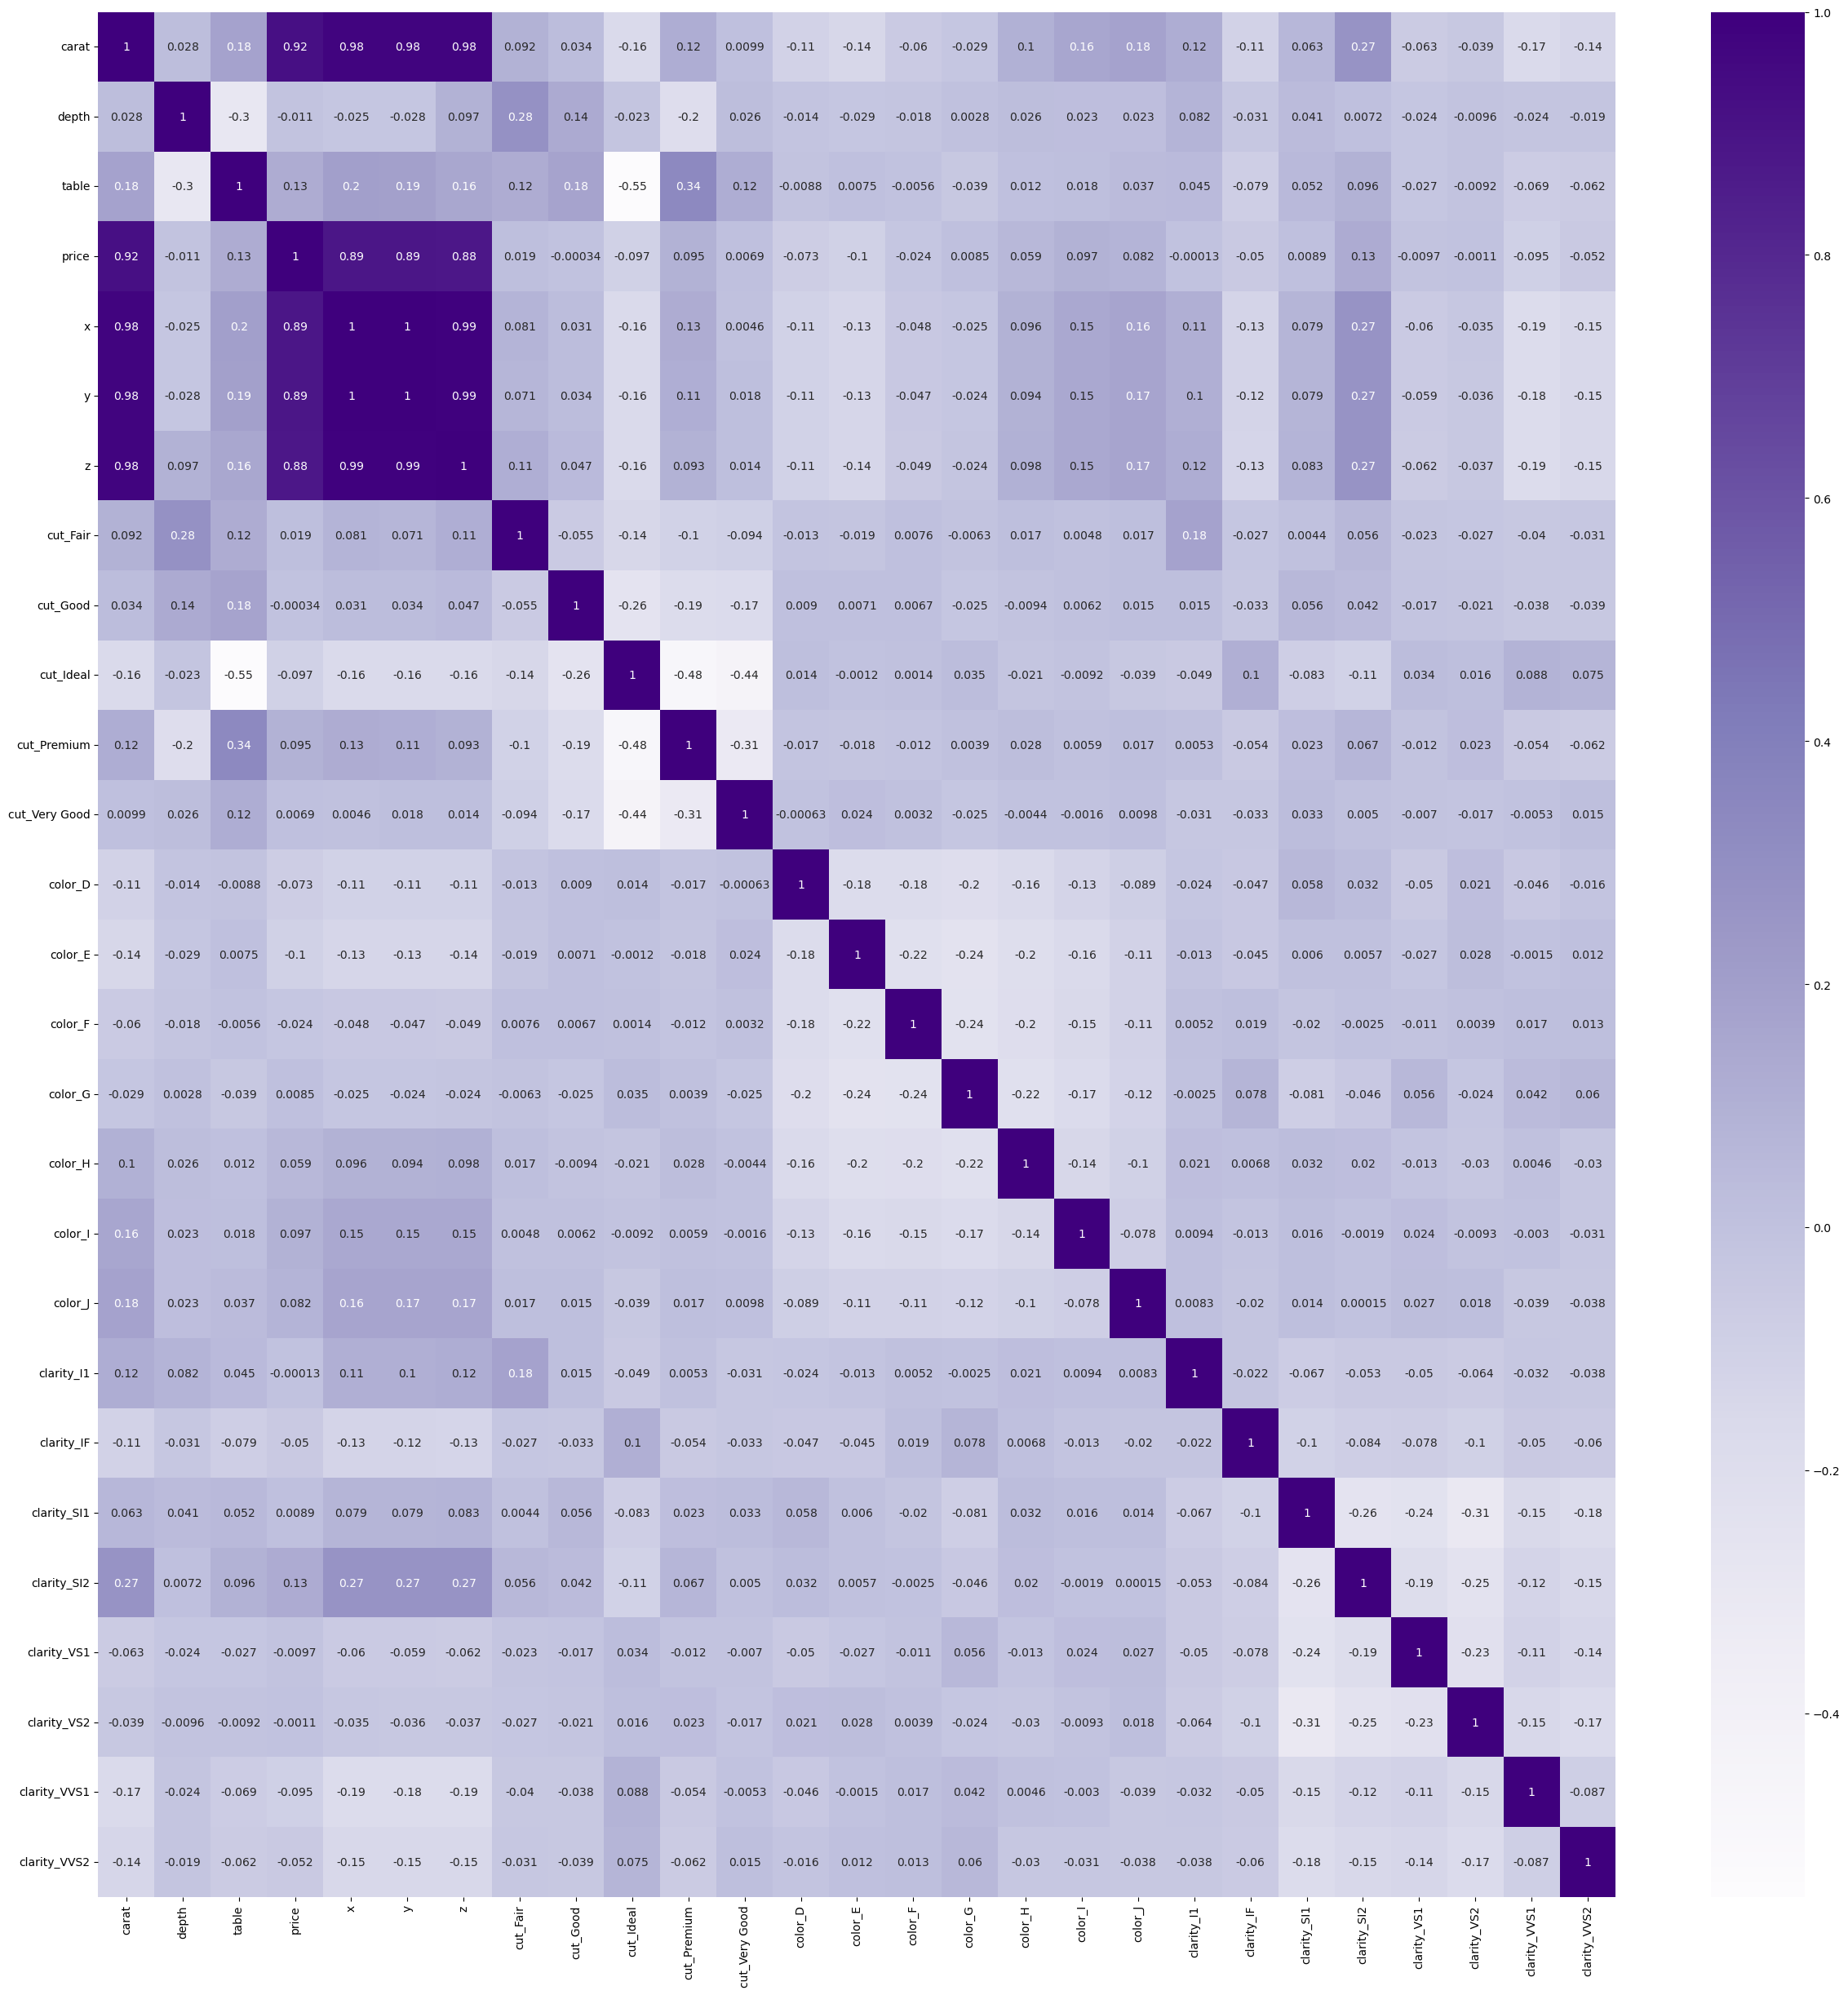

In [17]:
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= df_dummies.corr()
f, ax = plt.subplots(figsize=(30,30))
sns.heatmap(corrmat, annot=True, cmap='Purples')

In [18]:
X= df_dummies.drop(["price"],axis =1)
y= df_dummies["price"]
X= X.values
print(X.shape)
print(X.dtype)
X

(53916, 26)
float64


array([[ 0.23, 61.5 , 55.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.21, 59.8 , 61.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.23, 56.9 , 65.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.7 , 62.8 , 60.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.86, 61.  , 58.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.75, 62.2 , 55.  , ...,  0.  ,  0.  ,  0.  ]])

In [19]:
y= y.values
print(y.shape)
print(y.dtype)
y

(53916,)
int64


array([ 326,  326,  327, ..., 2757, 2757, 2757])

In [20]:
# 4. Model Buliding

In [21]:
# Let's split the data set into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [22]:
knn = knn = KNeighborsRegressor(n_neighbors=10)
tree = DecisionTreeRegressor(random_state=0)
forest = RandomForestRegressor(n_estimators=10, random_state=5)
gbrt = GradientBoostingRegressor(random_state=10)
xgbr = XGBRegressor(random_state=48)
lr = LinearRegression()

In [23]:
# Preprocessing by scaling Standard Scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Building a DecisionTree model on scaled training data
knn.fit(X_train_scaled, y_train)
# R^2 for a scaled test set
print("R^2 for a scaled test set: {:.2f}".format(
 knn.score(X_test_scaled, y_test)))
r_2_Knn = knn.score(X_test_scaled, y_test)

R^2 for a scaled test set: 0.95


In [25]:
# Building a DecisionTree model on scaled training data
tree.fit(X_train_scaled, y_train)
# R^2 for a scaled test set
print("R^2 for a scaled test set: {:.2f}".format(
 tree.score(X_test_scaled, y_test)))
r_2_Tree = tree.score(X_test_scaled, y_test)


R^2 for a scaled test set: 0.96


In [26]:
# Building a RandomForest model on scaled training data
forest.fit(X_train_scaled, y_train)
# R^2 for a scaled test set
print("R^2 for a scaled test set: {:.2f}".format(
 forest.score(X_test_scaled, y_test)))
r_2_Forest = forest.score(X_test_scaled, y_test)

R^2 for a scaled test set: 0.98


In [27]:
# Building a GradientBoosting model on scaled training data
gbrt.fit(X_train_scaled, y_train)
# R^2 for a scaled test set
print("R^2 for a scaled test set: {:.2f}".format(
 gbrt.score(X_test_scaled, y_test)))
r_2_Gbrt = gbrt.score(X_test_scaled, y_test)

R^2 for a scaled test set: 0.97


In [28]:
# Building a XGB model on scaled training data
xgbr = xgbr.fit(X_train_scaled, y_train)
# R^2 for a scaled test set
print("R^2 for a scaled test set: {:.2f}".format(
 xgbr.score(X_test_scaled, y_test)))
r_2_Xgbr = xgbr.score(X_test_scaled, y_test)

R^2 for a scaled test set: 0.98


In [29]:
lr = lr.fit(X_train_scaled, y_train)
# R^2 for a scaled test set
print("R^2 for a scaled test set: {:.2f}",format(
lr.score(X_test_scaled,y_test)))
r_2_lr = lr.score(X_test_scaled,y_test)


R^2 for a scaled test set: {:.2f} 0.9214655626698388


In [30]:
models = pd.DataFrame({
    'Model': ['KNeighbors', 'DecisionTree', 'RandomForest', 
              'GradientBoosting', 'XGBoosting','LinearRegression'],
    'Score': [r_2_Knn, r_2_Tree, r_2_Forest, r_2_Gbrt, r_2_Xgbr,r_2_lr]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,XGBoosting,0.980610
2,RandomForest,0.978162
3,GradientBoosting,0.967158
1,DecisionTree,0.962569
0,KNeighbors,0.946900
5,LinearRegression,0.921466


In [31]:
# Model prediction on test data
pred = xgbr.predict(X_test_scaled)

In [32]:
pred

array([1834.7195, 5548.375 , 2126.0723, ..., 6238.464 , 4575.756 ,
       5086.895 ], dtype=float32)

In [33]:
pred.shape

(13479,)

In [34]:
# 5. Model Evaluation

In [35]:
# For regression , the most commonly used metrics are:
# coefficient of determination R^2, 
# adjusted R^2,
# mean_absolute_error MAE,
# mean_squared_error MSE and 
# root_mean_square_error RMSE
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9806104330505603
Adjusted R^2: 0.9805729569324599
MAE: 284.5182148078507
MSE: 304085.31944950856
RMSE: 551.4393161985356


In [36]:
# The End.